Install dependencies

In [ ]:
#uncomment if you are running from google colab
!pip install sklearn_crfsuite
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
!pip install fastai==1.0.46
!pip install emoji

In [ ]:
!pip install gensim
!pip install dill
!pip install pandas
!pip install sklearn
!pip install numpy
!pip install matplotlib
!pip install pythainlp

# (in anaconda terminal)
# run "ipython kernel install --name "local-venv-kernel" --user"
# (in jupyter notebook)
# kernel --> change kernel

Import library

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from pythainlp.tokenize import word_tokenize
from gensim.models import KeyedVectors
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import dill as pickle
import pandas as pd
from pythainlp import word_vector
from pythainlp.word_vector import sentence_vectorizer


model_path = 'pretrained_wiki/'

In [3]:
#load into gensim
# model = KeyedVectors.load_word2vec_format(f'{model_path}thai2vec.bin',binary=True)
model = word_vector.get_model()

#create dataframe
thai2dict = {}
for word in model.index2word:
    thai2dict[word] = model[word]
thai2vec = pd.DataFrame.from_dict(thai2dict,orient='index')
thai2vec.head(10)

labels = model.index2word

In [5]:
#tnse
tsne = TSNE(n_components=2, init='pca', n_iter=1000)
thai2plot = tsne.fit_transform(thai2vec)
pickle.dump(thai2plot,open(f'{model_path}thai2plot.pkl','wb'))

In [ ]:
thai2plot = pickle.load(open(f'{model_path}thai2plot.pkl','rb'))

In [4]:
labels[:10]

['ที่', 'และ', 'เป็น', 'ของ', 'มี', 'ได้', '""""', 'การ', '(', ')']

In [6]:
# class model_instance:
# def __init__(self, labels_list,model):
#     self.labels_list = labels_list
#     self.model = model
#     self.thai2dict = {}
#     #create dataframe
#     for word in self.model.index2word:
#         self.thai2dict[word] = self.model[word]
#     self.thai2vec = pd.DataFrame.from_dict(thai2dict,orient='index')
#     thai2vec.head(10)
#     self.thai2plot = tsne.fit_transform(self.thai2vec)

# #     def make_thai2plot():
# #         self.thai2plot = tsne.fit_transform(self.thai2vec)

# def preprocess():
#     print('preprocessed')

def plot_from_sample(sample_words):
    sample_idx = []
    for word in sample_words:
        sample_idx.append(labels.index(word))
    sample_plot = thai2plot[sample_idx]
    plot_with_labels(sample_plot,sample_words)

def add_new_word(word):
    new_dict = {}
    new_word = sentence_vectorizer(word, use_mean=True) # nparrray dim(,300)
    new_dict[word] = new_word[0]
    new_df = pd.DataFrame.from_dict(new_dict,orient='index')
    thai2vec.append(new_df)
    thai2plot = tsne.fit_transform(thai2vec) # make_new_thai2plot
        
        
        
        

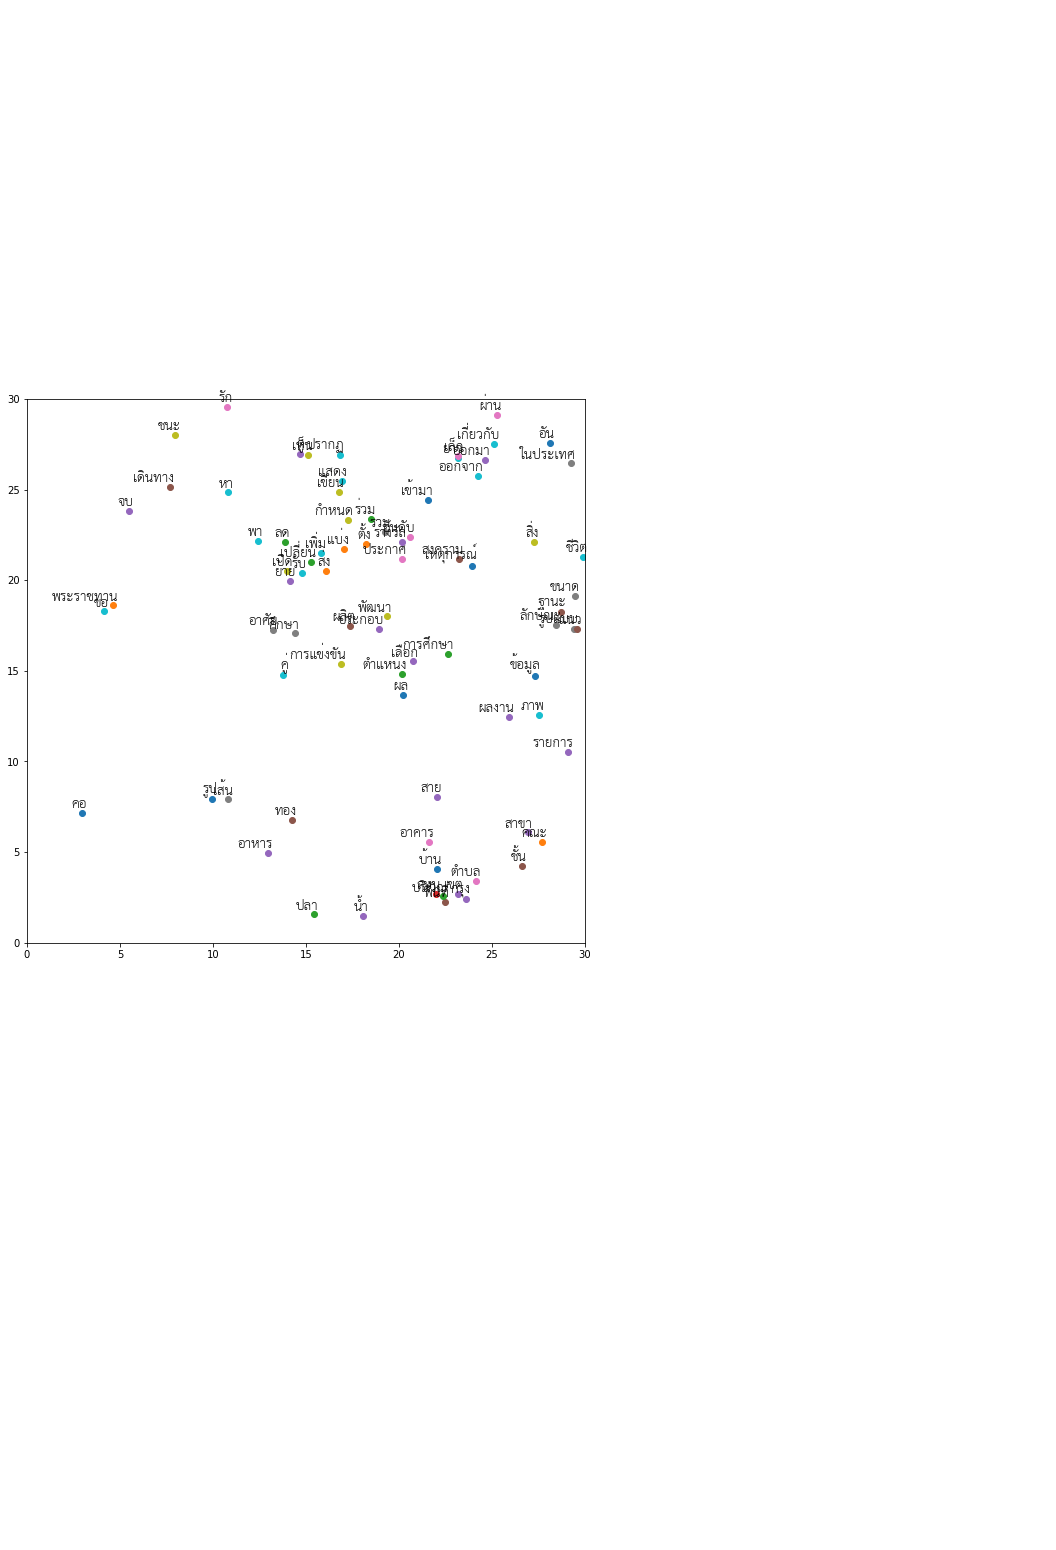

In [7]:
#stolen from https://blog.manash.me/how-to-use-pre-trained-word-vectors-from-facebooks-fasttext-a71e6d55f27
def plot_with_labels(low_dim_embs, labels, filename=None, figsize=(10,10),
                    axis_lims = None):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=figsize)  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = fm.FontProperties(fname=f'THSarabunNew.ttf',size=20)
        plt.annotate(label,
                 fontproperties=prop,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    if axis_lims is not None: plt.axis(axis_lims)
    if filename: plt.savefig(filename)
    
plot_with_labels(thai2plot[200:500],labels[200:500],axis_lims = [0,30,0,30])

Test features

In [56]:
#word arithmetic
model.most_similar_cosmul(positive=['ไข่ทอด'], negative=[])

[('2045', 0.9999797344207764),
 ('ไดแซ็กคาไรด์', 0.9999794960021973),
 ('wilhelmina', 0.9999750256538391),
 ('อภิชนาธิปไตย', 0.9999738931655884),
 ('838', 0.9999737739562988),
 ('ดินสอพอง', 0.9999735355377197),
 ('จานเสียง', 0.9999724626541138),
 ('ราศีมกร', 0.9999722242355347),
 ('เมี้ยน', 0.9999718070030212),
 ('isu', 0.9999717473983765)]

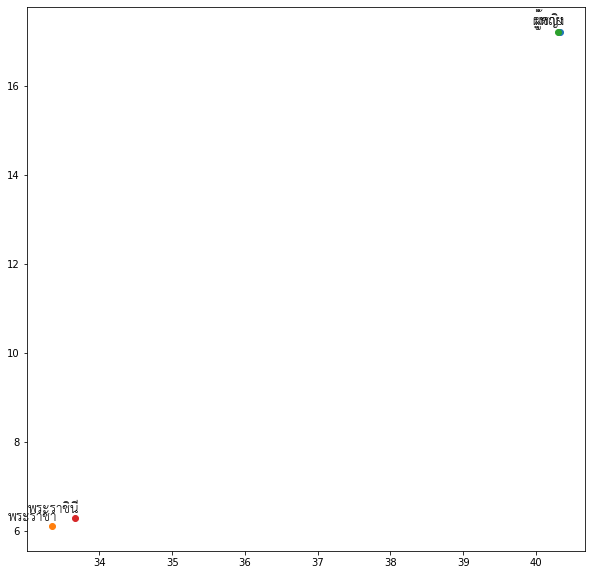

In [55]:
sample_words = ['ผู้หญิง','พระราชา','ผู้ชาย','พระราชินี']
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words)

In [54]:
model.most_similar_cosmul(positive=['นายกรัฐมนตรี'],negative=['อำนาจ'])

[('รองนายกรัฐมนตรี', 1.4945054054260254),
 ('รัฐมนตรี', 1.400755763053894),
 ('ประธานาธิบดี', 1.3626699447631836),
 ('พันเอก', 1.3437265157699585),
 ('ผู้บัญชาการทหารบก', 1.3405414819717407),
 ('ผู้กำกับภาพยนตร์', 1.3339321613311768),
 ('นักฟุตบอล', 1.331659197807312),
 ('เอกอัครราชทูต', 1.3306005001068115),
 ('แห้ง', 1.3243674039840698),
 ('สุภาพสตรี', 1.3231494426727295)]

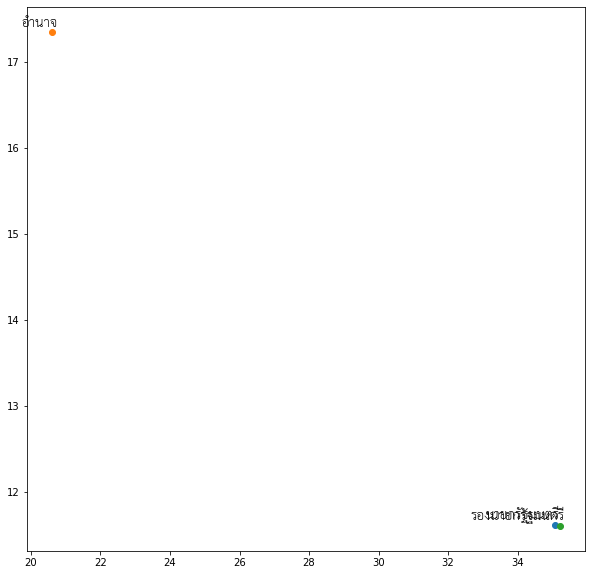

In [53]:
sample_words = ['นายกรัฐมนตรี','อำนาจ','รองนายกรัฐมนตรี']
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words)

In [ ]:
# sample_words = ['ข้าว','อาหาร','รถ','เรือ','บ้าน','ยา','เสื้อ','ก๋วยเตี๋ยวเรือ', 'ค่าขึ้นเรือ']
# sample_idx = []
# for word in sample_words:
#     sample_idx.append(labels.index(word))
# sample_plot = thai2plot[sample_idx]
# plot_with_labels(sample_plot,sample_words)

In [ ]:
# test_instance = model_instance(labels,model)

In [47]:
print(thai2vec)

                 0         1         2         3         4         5    \
ที่         0.308956 -0.097699  0.116745  0.215612  0.015768 -0.064163   
และ         0.010751 -0.618971  0.129665  0.035460 -0.007560  0.027607   
เป็น       -0.015736 -0.258926  0.052953  0.153728 -0.005985 -0.021081   
ของ        -0.189711 -0.174774  0.171124 -0.186771  0.054294 -0.114150   
มี         -0.156962 -0.231863  0.080312  0.323157  0.215695  0.055145   
...              ...       ...       ...       ...       ...       ...   
ไลต์ฟ       0.003361 -0.016570 -0.087134  0.010009 -0.024552 -0.023878   
ไหนว่า      0.004052 -0.017273 -0.086782  0.009518 -0.024050 -0.024528   
ไอซ์ที      0.003284 -0.018590 -0.087451  0.010155 -0.024508 -0.022246   
ไอบูโปรเฟน  0.001181 -0.018887 -0.089136  0.010626 -0.025262 -0.022990   
ไออุ่น      0.003489 -0.017758 -0.086213  0.009525 -0.023742 -0.022018   

                 6         7         8         9    ...       290       291  \
ที่         0.062168  0.039649  

In [14]:
new_word_list = [
    'ข้าวราดแกง',
    'หมูกรอบ',
    'หมู',
    'กรอบ',
    'สเต็ก',
    'สปาเก็ตตี้'
]

In [10]:
import time
start_time = time.time()

# add_new_word()
def add_word(new_word):
    if labels.count(new_word) == 0:
        # new_dict = {}
        new_word_vec = sentence_vectorizer(new_word, use_mean=True) # nparrray dim(,300)
        thai2dict[new_word] = new_word_vec[0]
        # new_df = pd.DataFrame.from_dict(new_dict,orient='index')
        # thai2vec.append(new_df)
        labels.append(new_word)


        #create dataframe
        # thai2dict = {}
        # for word in model.index2word:
        #     thai2dict[word] = model[word]
        thai2vec = pd.DataFrame.from_dict(thai2dict,orient='index')
        thai2vec.head(10)

        thai2plot = tsne.fit_transform(thai2vec) # make_new_thai2plot
        print(new_word,"--- %s seconds ---" % (time.time() - start_time))
    else:
        print(new_word,'already exist')


In [15]:
for i in new_word_list:
    add_word(i)

ข้าวราดแกง already exist
หมูกรอบ already exist
หมู already exist
กรอบ already exist
สเต็ก already exist
สปาเก็ตตี้ --- 1094.0488984584808 seconds ---


In [ ]:
new_word = 'สปาเก็ตตี้'
add_word(new_word)

In [ ]:
# ก๋วยเตี๋ยวเรือ --- 352.3014917373657 seconds ---
# ค่านั่งเรือ --- 361.8136339187622 seconds ---
# ก๋วยเตี๋ยว --- 292.9041979312897 seconds ---
# 'ราดแกง' --- 388.65820145606995 seconds ---

In [17]:
print(len(thai2plot))
print(len(labels))
print(labels[-5:])
print(thai2plot[-5:])

51358
51361
['ไอบูโปรเฟน', 'ไออุ่น', 'ข้าวราดแกง', 'หมูกรอบ', 'สปาเก็ตตี้']
[[-17.110855   25.14603  ]
 [ -5.233292   45.486847 ]
 [  5.0284905  46.899757 ]
 [ -2.1599755  33.00281  ]
 [ -9.228945   39.38237  ]]


In [17]:
print(labels.count('ก๋วยเตี๋ยว'))

1


In [16]:
labels.remove('ก๋วยเตี๋ยว')

In [16]:
sample_words = ['ข้าว','อาหาร','รถ','เรือ','บ้าน','ยา','เสื้อ','ก๋วยเตี๋ยว','เรือ','ข้าวเหนียว','หมูกรอบ','สปาเก็ตตี้','สเต็ก','หมู','ไก่ย่าง','ไก่ทอด','ไก่','แท็กซี่','ไข่ทอด']
plot_from_sample(sample_words)

IndexError: index 51359 is out of bounds for axis 0 with size 51358

In [ ]:
pickle.dump(thai2plot,open(f'{model_path}thai2plot_goodwallet.pkl','wb'))

In [1]:
print(len(labels))
for i in labels:
    print(i)

NameError: name 'labels' is not defined